In [161]:
!rm -rf cse151Aproject
!git clone https://github.com/Akshat30/cse151Aproject

Cloning into 'cse151Aproject'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 138 (delta 45), reused 22 (delta 22), pack-reused 82
Receiving objects: 100% (138/138), 7.31 MiB | 22.28 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [162]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Import song data
song_data = pd.read_csv("/content/cse151Aproject/spotifydata_updated_popularity.csv")

#Data Exploration and Cleaning

In [163]:
# Printing info for dataframe
print(song_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10130 entries, 0 to 10129
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entry             10130 non-null  int64  
 1   danceability      10127 non-null  float64
 2   energy            10127 non-null  float64
 3   key               10127 non-null  float64
 4   loudness          10127 non-null  float64
 5   mode              10127 non-null  float64
 6   speechiness       10127 non-null  float64
 7   acousticness      10130 non-null  float64
 8   instrumentalness  10130 non-null  float64
 9   liveness          10130 non-null  float64
 10  valence           10130 non-null  float64
 11  tempo             10130 non-null  float64
 12  type              10130 non-null  object 
 13  id                10130 non-null  object 
 14  uri               10130 non-null  object 
 15  track_href        10130 non-null  object 
 16  analysis_url      10130 non-null  object

In [164]:
# Dataframe's describe insights
print(song_data.describe())

              entry  danceability        energy           key      loudness  \
count  10130.000000  10127.000000  10127.000000  10127.000000  10127.000000   
mean    5064.500000      0.581843      0.540481      5.214575     -9.554459   
std     2924.423447      0.166553      0.266178      3.562244      6.432424   
min        0.000000      0.000000      0.000707      0.000000    -43.851000   
25%     2532.250000      0.473000      0.340000      2.000000    -11.582500   
50%     5064.500000      0.592000      0.578000      5.000000     -7.510000   
75%     7596.750000      0.703000      0.757000      8.000000     -5.307500   
max    10129.000000      0.978000      0.996000     11.000000     -0.150000   

               mode   speechiness  acousticness  instrumentalness  \
count  10127.000000  10127.000000  10130.000000      10130.000000   
mean       0.631974      0.077888      0.384464          0.191026   
std        0.482292      0.082423      0.357545          0.339254   
min        0

In [165]:
print(song_data[song_data['popularity'] == 0].count())

# 195 songs have a popularity of 0

entry               195
danceability        195
energy              195
key                 195
loudness            195
mode                195
speechiness         195
acousticness        195
instrumentalness    195
liveness            195
valence             195
tempo               195
type                195
id                  195
uri                 195
track_href          195
analysis_url        195
duration_ms         195
time_signature      195
song_name           195
artist              195
genre               195
popularity          195
dtype: int64


In [166]:
# Drop non numerical columns (entry is just a counter)
song_data_numerical = song_data.drop(['entry', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'artist', 'genre'], axis=1)

**Below we calculated a correlation matrix for each feature. Some features definitely have a relationship with values reaching as high as an absolute value of 0.83. Notably we find low correlation with popularity**

<Axes: >

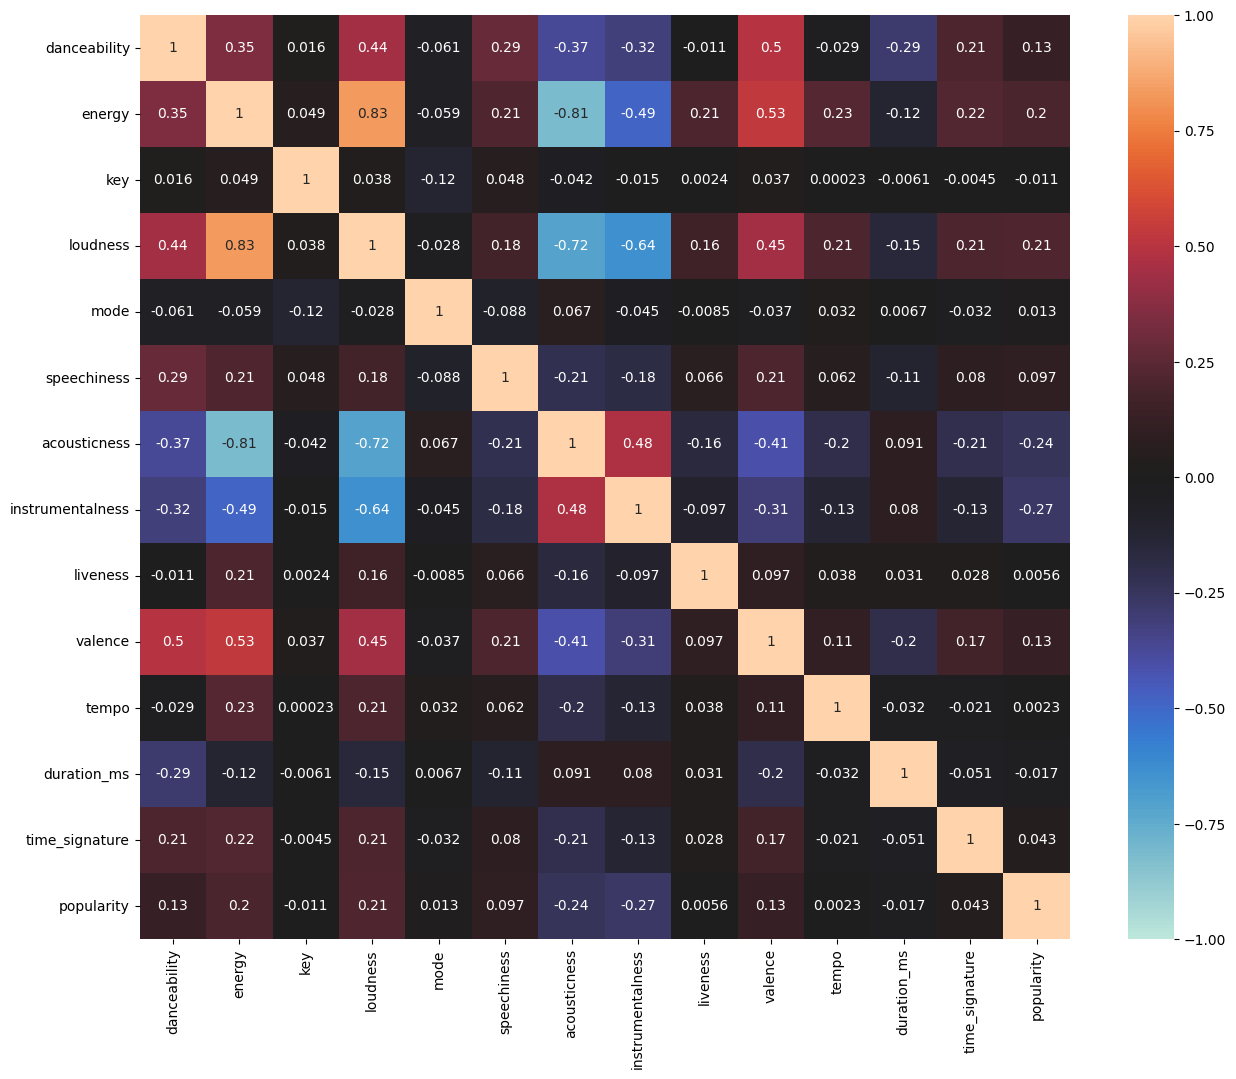

In [167]:
song_data_corr = song_data_numerical.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(song_data_corr, vmin=-1, vmax=1, center=0, annot=True)

**We then decided to one hot encode the categorical features. Finding the unique genres, keys, and time signatures and then manually encoding them.**

In [168]:
genres = song_data['genre'].unique()

In [169]:
keys= song_data['key'].dropna().unique()

In [170]:
time_sigs = song_data['time_signature'].unique()

In [171]:
class_arr = np.array(song_data["genre"]) #one hot encode genre
for genre in genres:
  arr= class_arr == genre
  song_data_numerical[genre] = 1*arr


In [172]:
class_arr = np.array(song_data["key"]) #one hot encode key
for key in keys:
  arr= class_arr == key
  song_data_numerical['key' + str(key)] = 1*arr

In [173]:
class_arr = np.array(song_data['time_signature']) #one hot encode time_signature
for sig in time_sigs:
  arr= class_arr == sig
  song_data_numerical['time' + str(sig)] = 1*arr

**We now have our categorical variables one hot encoded**

In [174]:
song_data_numerical = song_data_numerical.drop(columns=['key','time_signature'], axis=1)

In [175]:
song_data_numerical.columns

Index(['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'popularity', 'absolute music', 'classical',
       'electronic', 'folk', 'hiphop', 'jazz', 'popular', 'rnb', 'rock',
       'key11.0', 'key6.0', 'key9.0', 'key2.0', 'key0.0', 'key5.0', 'key3.0',
       'key4.0', 'key1.0', 'key8.0', 'key10.0', 'key7.0', 'time4.0', 'time5.0',
       'time3.0', 'time1.0', 'time0.0'],
      dtype='object')

**We also created two new features: artist name and song name length. This gives some quantitative meaning the artist name and song name features and attempts to see whether the length of a song's or artist's name affects popularity**

In [176]:
song_data_numerical['artist_name_length'] = song_data['artist'].apply(lambda x: len(str(x))) # adds column for artist name length

In [177]:
song_data_numerical['song_name_length'] = song_data['song_name'].apply(lambda x: len(str(x)))# adds column for song name length

In [178]:
song_data_numerical['energy'].max() # many columns are not min/maxed

0.996

In [179]:
cats_to_min_max = ['danceability','energy', 'speechiness',    'acousticness',   'instrumentalness',    'liveness',    'valence',    'tempo', 'song_name_length', 'artist_name_length']


**Here we min max scale the columns using sklearn.**

In [180]:
from sklearn.preprocessing import MinMaxScaler
for cat in cats_to_min_max:
  scaler = MinMaxScaler()
  scaler.fit(song_data_numerical[[cat]])
  song_data_numerical[cat] = scaler.transform(np.array(song_data_numerical[cat]).reshape(-1,1))
song_data_numerical

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScal

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key8.0,key10.0,key7.0,time4.0,time5.0,time3.0,time1.0,time0.0,artist_name_length,song_name_length
0,0.757669,0.741785,-4.627,0.0,0.045093,0.005430,0.027172,0.041696,0.432790,0.572717,...,0,0,0,1,0,0,0,0,0.184783,0.173913
1,0.663599,0.976891,-4.391,1.0,0.103037,0.000640,0.668687,0.126593,0.225051,0.581548,...,0,0,0,1,0,0,0,0,0.108696,0.111801
2,0.808793,0.865366,-3.240,0.0,0.128505,0.037147,0.000022,0.074067,0.602851,0.563563,...,0,0,0,1,0,0,0,0,0.130435,0.142857
3,0.754601,0.864362,-4.141,1.0,0.276869,0.319276,0.001838,0.322041,0.590631,0.599860,...,0,0,0,1,0,0,0,0,0.086957,0.080745
4,0.661554,0.847281,-3.756,1.0,0.053388,0.013753,0.000665,0.095036,0.759674,0.667977,...,0,0,0,1,0,0,0,0,0.076087,0.043478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10125,0.479550,0.562943,-7.596,1.0,0.029322,0.008743,0.000005,0.334256,0.362525,0.398281,...,0,0,0,1,0,0,0,0,0.119565,0.149068
10126,0.468303,0.798049,-3.265,1.0,0.067056,0.003171,0.000204,0.068162,0.522403,0.560086,...,0,0,0,1,0,0,0,0,0.217391,0.049689
10127,0.688139,0.817139,-5.411,1.0,0.042874,0.013351,0.002960,0.340364,0.741344,0.669004,...,0,0,0,1,0,0,0,0,0.097826,0.124224
10128,0.399796,0.818144,-6.197,1.0,0.060514,0.017769,0.002283,0.272161,0.658859,0.383528,...,0,0,0,1,0,0,0,0,0.097826,0.111801


<Axes: >

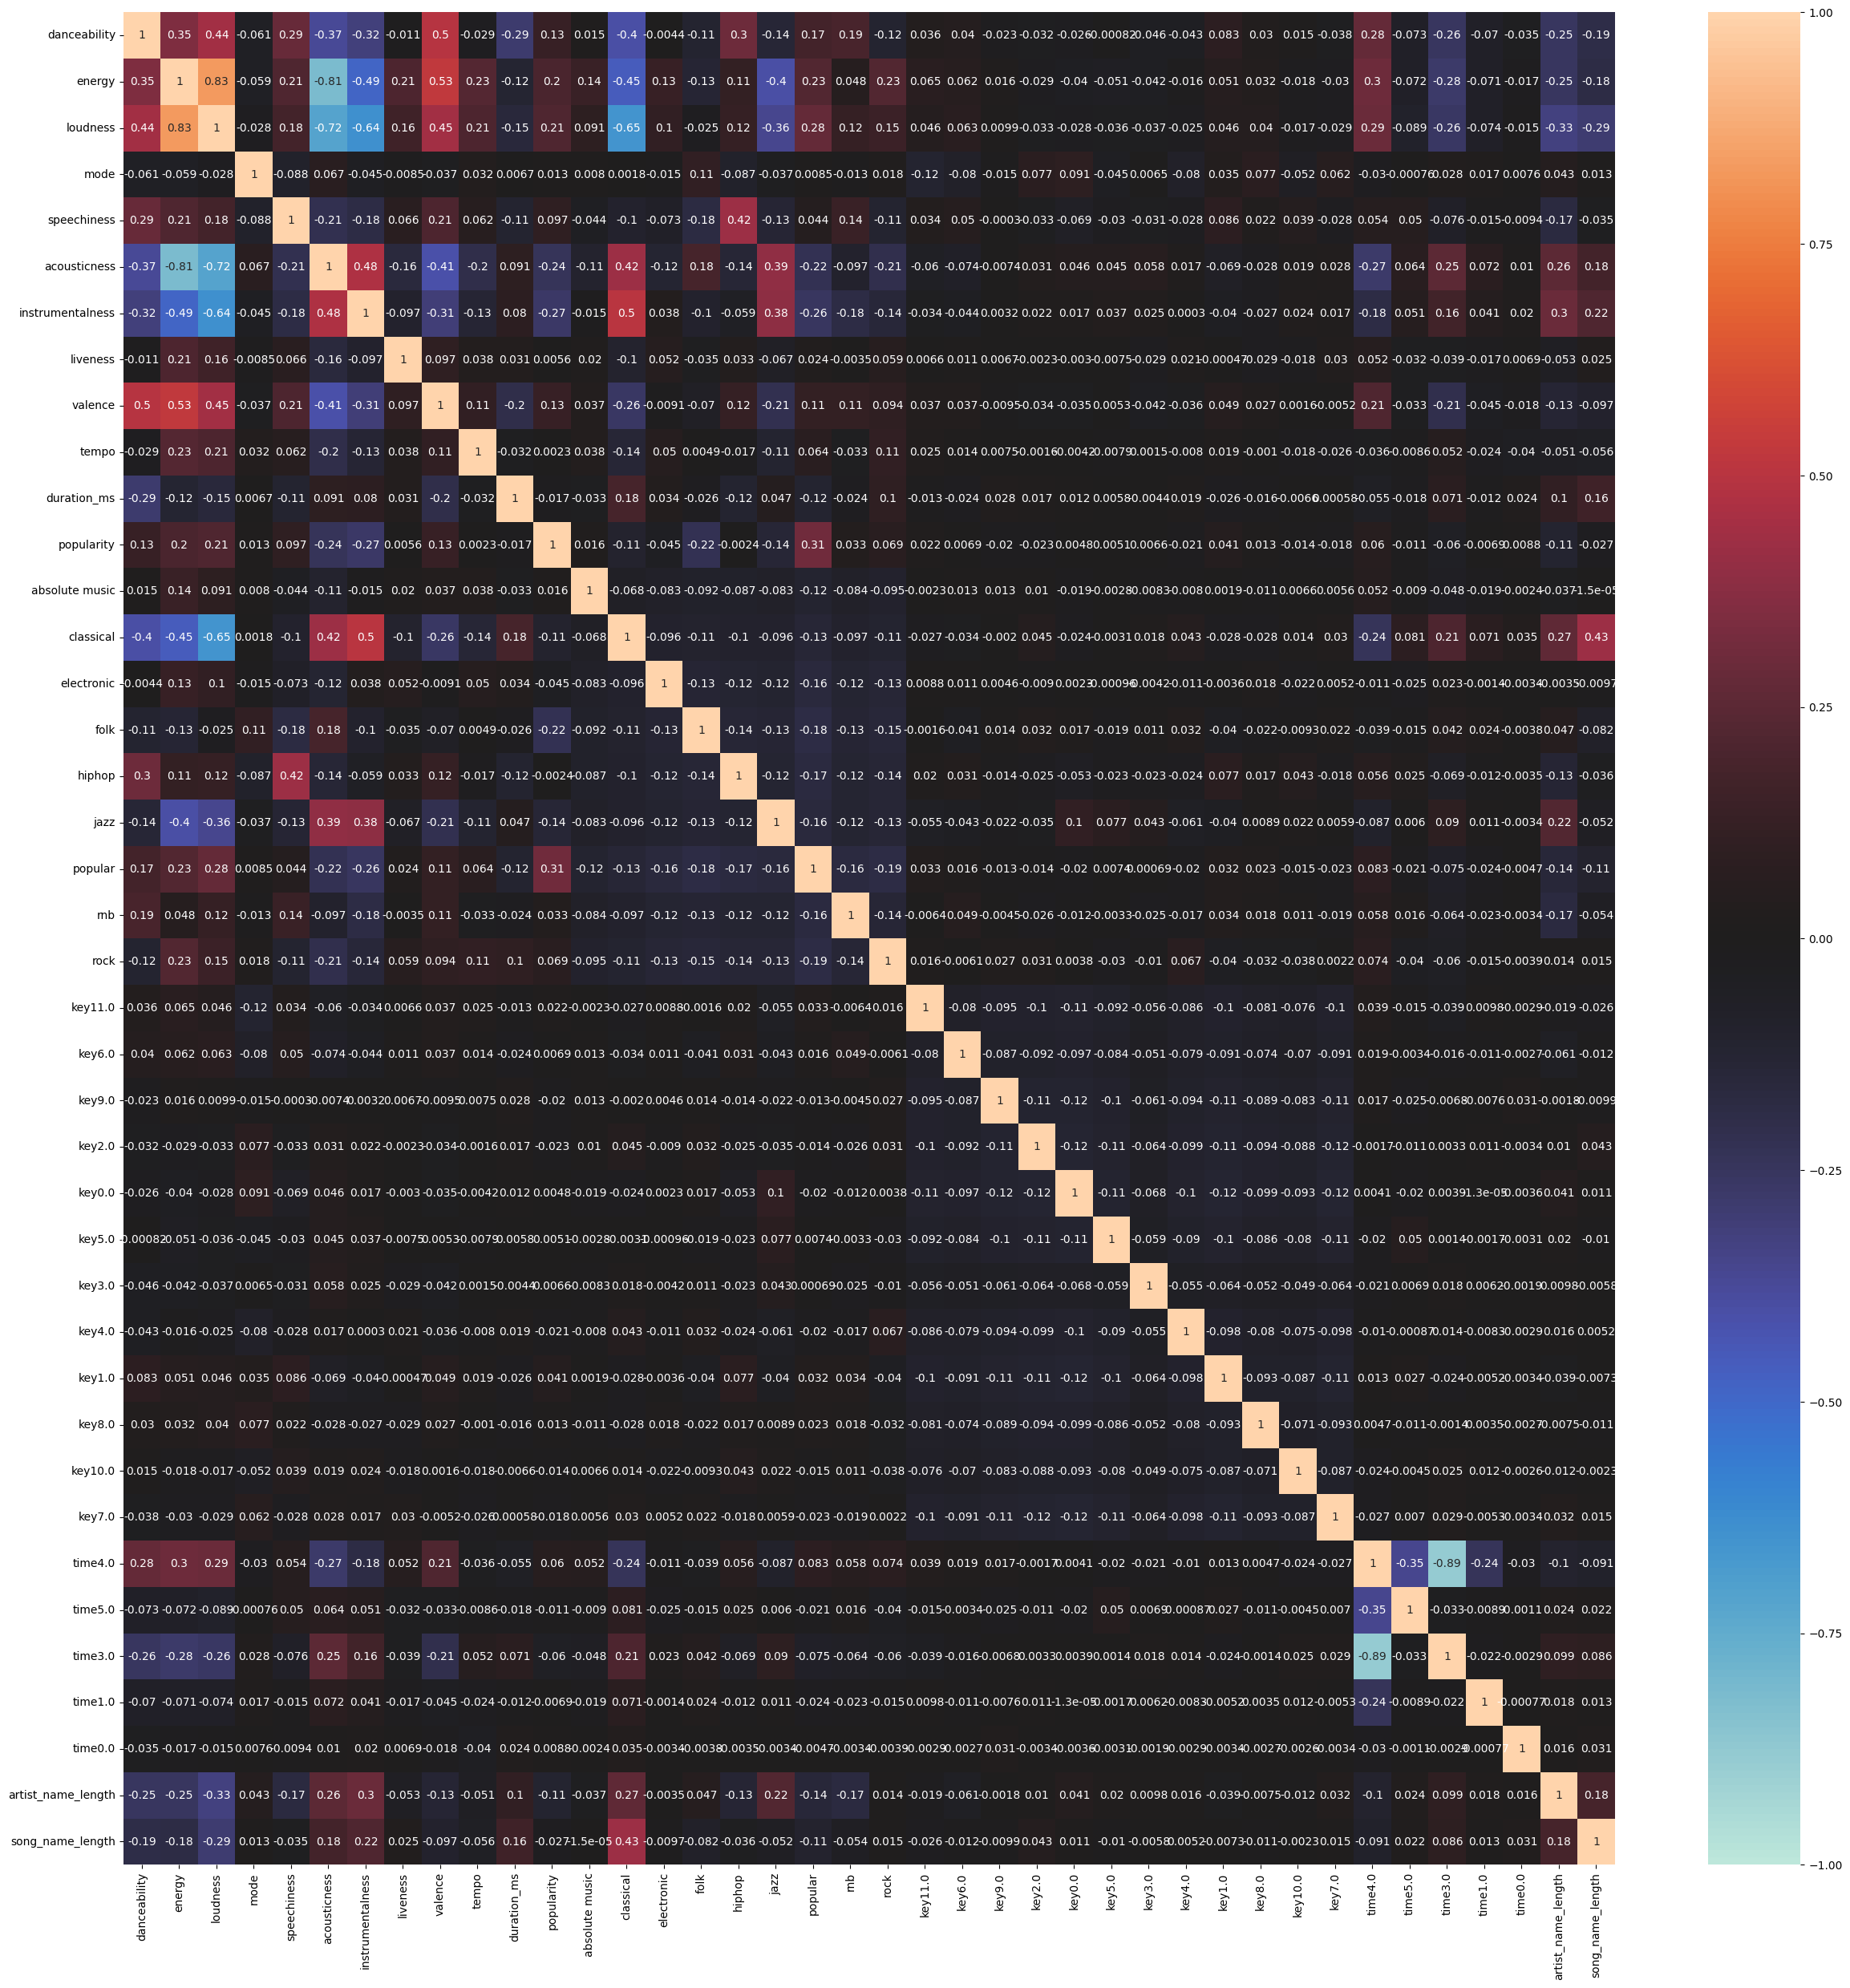

In [181]:
song_data_corr = song_data_numerical.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(song_data_corr, vmin=-1, vmax=1, center=0, annot=True)

#Model Creation

##Model 1

**We now begin our model creation, creating our testing and training data and doing some simple cleaning.**

In [182]:
from sklearn.model_selection import train_test_split

X = song_data_numerical.drop("popularity", axis=1)
y = song_data_numerical['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

X_train.dropna(inplace=True)
y_train = y_train.loc[X_train.index]
X_test.dropna(inplace=True)
y_test = y_test.loc[X_test.index]

**Our initial linear regression model below, with a high MSE in the 400s. This is a simple regression model**

CV MSE: 449.1122655861724


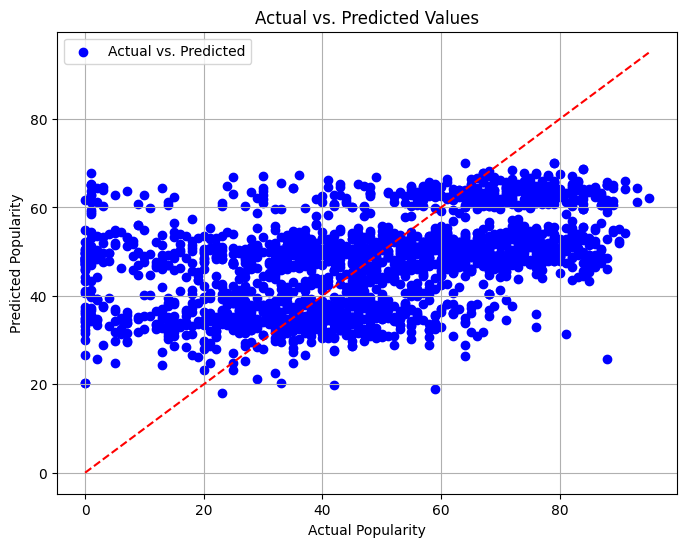

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

model = LinearRegression()

cv = KFold(n_splits=10, shuffle=True, random_state=69)
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
average_mse = scores.mean()
print('CV MSE:', -average_mse)

model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs. Predicted Values')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [184]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R2:', r2)

MSE: 437.17367820600833
R2: 0.18691690927630367


In [185]:
y_train_pred = model2.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_train

444.6857792808256

##Model 2

**For our next model, we attempt to impute null values with the means of the features, and we also move on to a Gradient Boosting Regressor in hopes of creating a more complex model.**

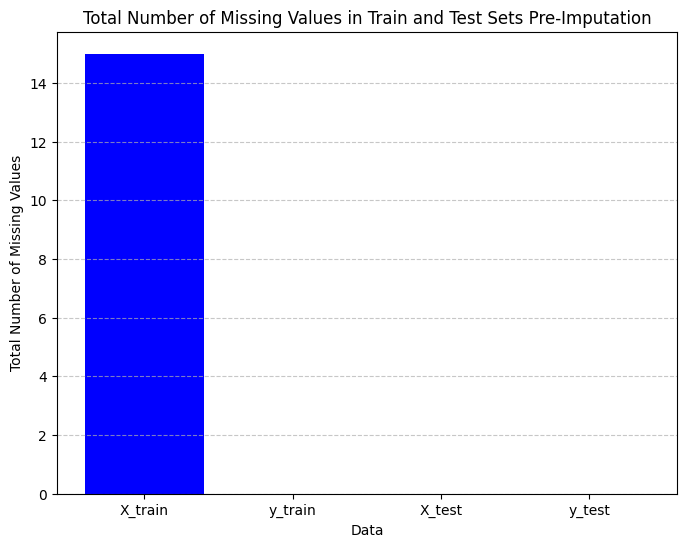

In [186]:
from sklearn.model_selection import train_test_split

X = song_data_numerical.drop("popularity", axis=1)
y = song_data_numerical['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)


missing_train_x = X_train.isnull().sum().sum()

missing_train_y = y_train.isnull().sum().sum()

missing_test_x = X_test.isnull().sum().sum()

missing_test_y = y_test.isnull().sum().sum()


# Combine missing percentages for X_train and X_test


X_train.fillna(X_train.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)

X_test.fillna(X_test.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)

labels = ['X_train', 'y_train', 'X_test', 'y_test']
missing_values = [missing_train_x, missing_train_y, missing_test_x, missing_test_y]

plt.figure(figsize=(8, 6))
plt.bar(labels, missing_values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Data')
plt.ylabel('Total Number of Missing Values')
plt.title('Total Number of Missing Values in Train and Test Sets Pre-Imputation')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Test MSE: 399.97546067610523
Train MSE: 347.7402630199366


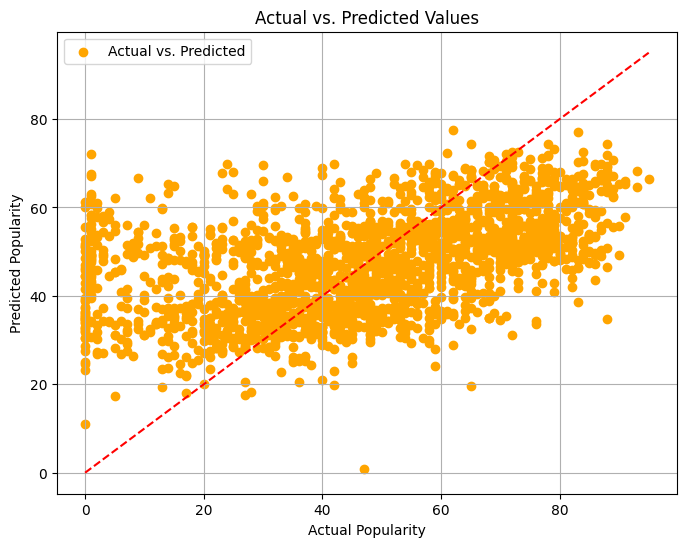

In [187]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gbr_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=69
)

gbr_model.fit(X_train_scaled, y_train)

y_test_pred = gbr_model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {mse}")

y_train_pred = gbr_model.predict(X_train_scaled)


mse = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE: {mse}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='orange', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs. Predicted Values')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}


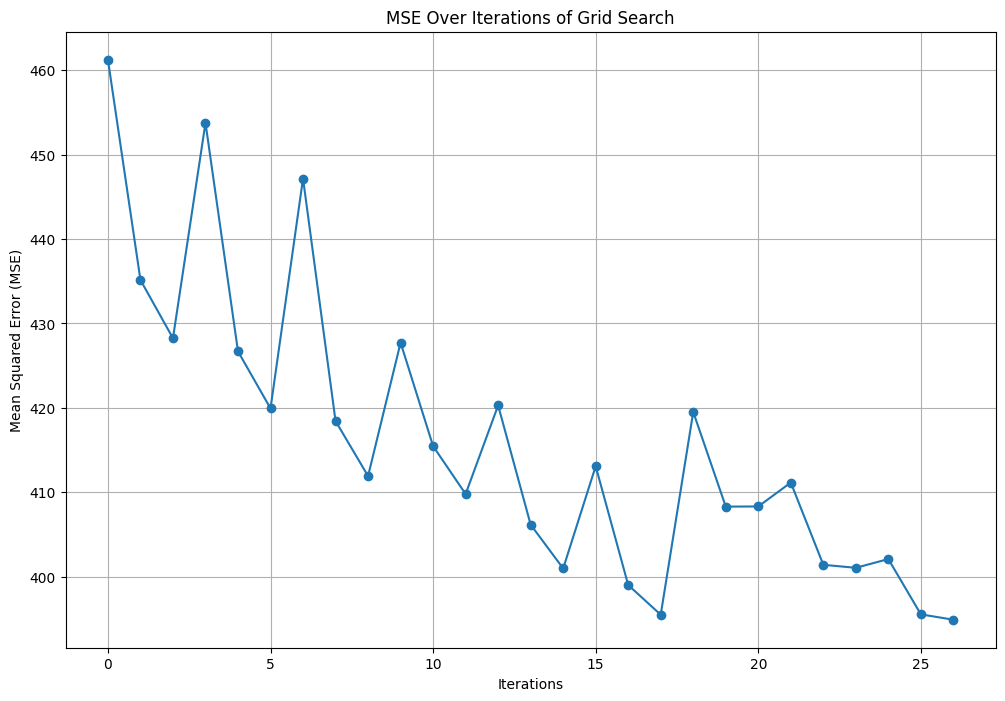

In [188]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
}

gbr_model = GradientBoostingRegressor(random_state=69)
grid_search = GridSearchCV(estimator=gbr_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Here we print out our best Params
print("Best Parameters:", grid_search.best_params_)

mean_test_scores = -grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']

plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(mean_test_scores)), mean_test_scores, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Over Iterations of Grid Search')
plt.grid(True)

**Using the grid search above, we fit a model with more optimal hyperparameters, and get an improved model with lower test MSE but a model that is overfitting**

Test MSE: 371.38533319289274
Train MSE: 106.98165918403983


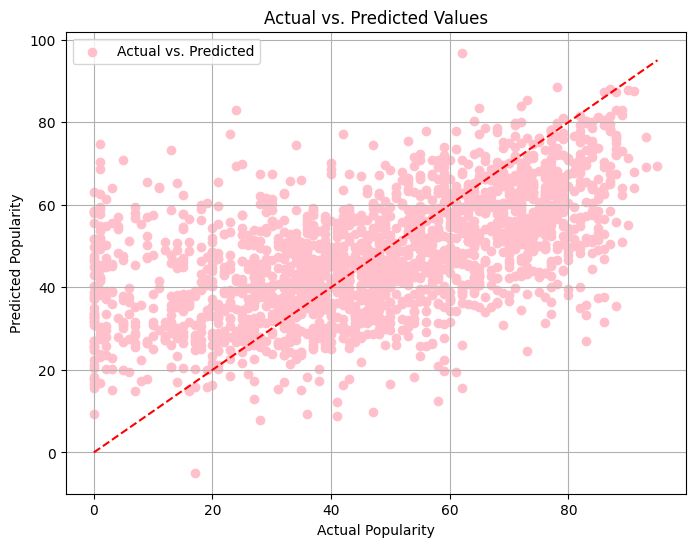

In [189]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gbr_model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=5,
    random_state=69
)

gbr_model.fit(X_train_scaled, y_train)

y_test_pred = gbr_model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {mse}")

y_train_pred = gbr_model.predict(X_train_scaled)


mse = mean_squared_error(y_train, y_train_pred)
print(f"Train MSE: {mse}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='pink', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs. Predicted Values')
plt.legend(loc='best')
plt.grid(True)
plt.show()


##Model 3

371.8593377175866
134.97723106462342


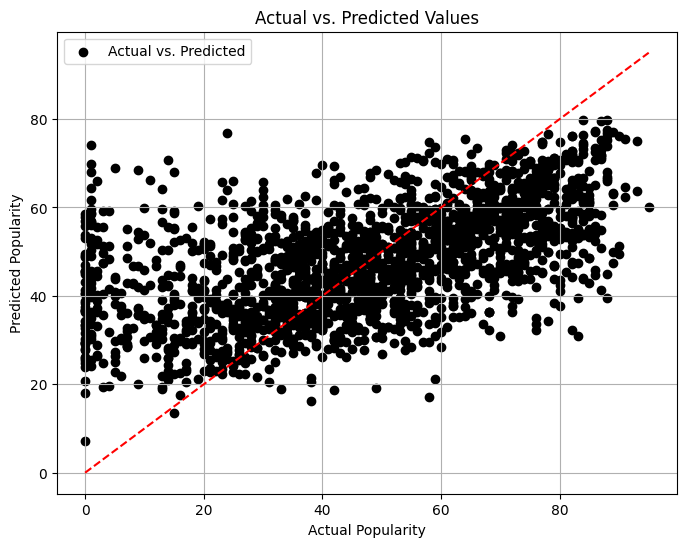

In [190]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(max_depth=15, n_estimators = 50, \
                               min_samples_split= 5, min_samples_leaf = 2, random_state=69)

forest.fit(X_train, y_train)

ytest_hat = forest.predict(X_test)
ytrain_hat = forest.predict(X_train)

print(mean_squared_error(y_test, ytest_hat))
print(mean_squared_error(y_train, ytrain_hat))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, ytest_hat, color='k', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs. Predicted Values')
plt.legend(loc='best')
plt.grid(True)
plt.show()


##Model 4 and 5 Bonus Classfier

***We decided to try to classify the songs into 2 bins: not popular (0), popular(1). First we try a Logistic Model, then an ANN. Both models struggle to be accurate however the ANN reaches about 74% accuracy which is fairly impressive for this data set.

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


y_train_classed = y_train.apply(lambda x: 0 if x < 60 else 1)
y_test_classed = y_test.apply(lambda x: 0 if x < 60 else 1)

from imblearn.over_sampling import SMOTE
X_train_ov, y_train_ov = SMOTE(random_state=42).fit_resample(X_train_scaled,y_train_classed)

model1 = LogisticRegression()  # Ovr means one-vs-rest strategy, it is used for multiclass
model1.fit(X_train_ov, y_train_ov)
y_pred = model1.predict(X_test_scaled)
accuracy = accuracy_score(y_test_classed, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test_classed, y_pred))

Accuracy: 0.6860809476801579

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.62      0.72      1342
           1       0.52      0.81      0.63       684

    accuracy                           0.69      2026
   macro avg       0.69      0.72      0.68      2026
weighted avg       0.75      0.69      0.69      2026



In [192]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



model1 = Sequential()
model1.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model1.fit(X_train_scaled, y_train_classed, epochs=40, batch_size=50, validation_split=0.2)

# Evaluate the model


y_pred = model1.predict(X_test_scaled)
y_pred_binary = np.where(y_pred>.5,1,0)
accuracy = accuracy_score(y_test_classed, y_pred_binary)
print('Test Accuracy:', accuracy)
print(classification_report(y_test_classed, y_pred_binary))

Epoch 1/40
130/130 [==============================] - 2s 7ms/step - loss: 0.5766 - accuracy: 0.6880 - val_loss: 0.5212 - val_accuracy: 0.7347
Epoch 2/40
130/130 [==============================] - 1s 4ms/step - loss: 0.5184 - accuracy: 0.7308 - val_loss: 0.5013 - val_accuracy: 0.7465
Epoch 3/40
130/130 [==============================] - 0s 3ms/step - loss: 0.5012 - accuracy: 0.7438 - val_loss: 0.4971 - val_accuracy: 0.7465
Epoch 4/40
130/130 [==============================] - 0s 3ms/step - loss: 0.4932 - accuracy: 0.7500 - val_loss: 0.4954 - val_accuracy: 0.7428
Epoch 5/40
130/130 [==============================] - 0s 3ms/step - loss: 0.4878 - accuracy: 0.7515 - val_loss: 0.4922 - val_accuracy: 0.7434
Epoch 6/40
130/130 [==============================] - 0s 3ms/step - loss: 0.4818 - accuracy: 0.7551 - val_loss: 0.4902 - val_accuracy: 0.7502
Epoch 7/40
130/130 [==============================] - 0s 3ms/step - loss: 0.4777 - accuracy: 0.7583 - val_loss: 0.4865 - val_accuracy: 0.7514
Epoch 